In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 ' Linux'로 확인
    
    if system_name == 'Darwin':
        font_family = 'AppleGothic'
    elif system_name == 'Windows':
        font_family = 'Malgun Gothic'
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야 한다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨짐
        !apt-get update -qq
        !apt-get install fonts-nanum -qq > /dev/null
        
        import matplotlib.font_manager as fm
        
        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = 'NanumBarunGothic'
    return font_family

font_family = get_font_family()

# 그래프 스타일 설정
# 그래프 스타일을 밑에서 설정하면 폰트가 깨진다
plt.style.use('dark_background')
# 폰트설정
plt.rc('font', family=font_family)
# 마이너스 폰트 설정
plt.rc('axes', unicode_minus=False)


df = pd.read_csv('eft_2021-09-04.csv', dtype={'종목코드': object})
df.head()

,종목코드,탭코드,종목명,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억),유형,브랜드,인버스,레버리지,환헤지H
0,069500,1,KODEX 200,41930,2,270,0.65,41979.0,-3.1976,2807005,117551,54593,국내 시장지수,KODEX,False,False,False
1,102110,1,TIGER 200,41960,2,270,0.65,42009.0,-3.1484,992124,41597,23225,국내 시장지수,TIGER,False,False,False
2,153130,6,KODEX 단기채권,102885,2,10,0.01,102883.0,0.0291,7598,781,20968,채권,KODEX,False,False,False
3,252670,3,KODEX 200선물인버스2X,2000,5,-25,-1.23,2004.0,5.2631,113442718,227795,20042,국내 파생,KODEX,True,False,False
4,371460,4,TIGER 차이나전기차SOLACTIVE,16480,5,-670,-3.91,NaN,26.3319,12395343,207101,18702,해외 주식,TIGER,False,False,False


Text(0.5, 1.0, 'ETF유형별 평균 거래대금(백만)')

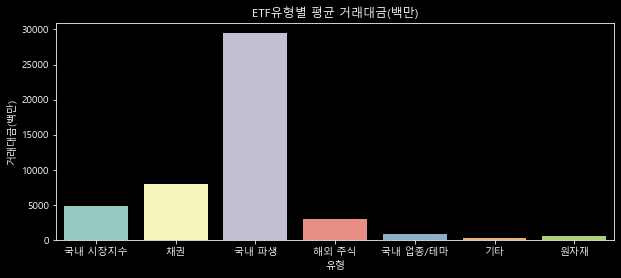

In [4]:
plt.figure(figsize=(10,4))
sns.barplot(data=df, x='유형', y='거래대금(백만)', ci=None).set_title('ETF유형별 평균 거래대금(백만)')

In [2]:
df.groupby(['유형'])['거래대금(백만)'].mean().sort_values(ascending=False)

유형
국내 파생       29492.290323
채권           7962.550000
국내 시장지수      4916.030769
해외 주식        3054.469027
국내 업종/테마      820.132979
원자재           628.500000
기타            305.806452
Name: 거래대금(백만), dtype: float64

In [1]:
pd.pivot_table(data=df, index='유형', values='거래대금(백만)').sort_values(by='거래대금(백만)',
                                                                   ascending=False)

NameError: name 'pd' is not defined

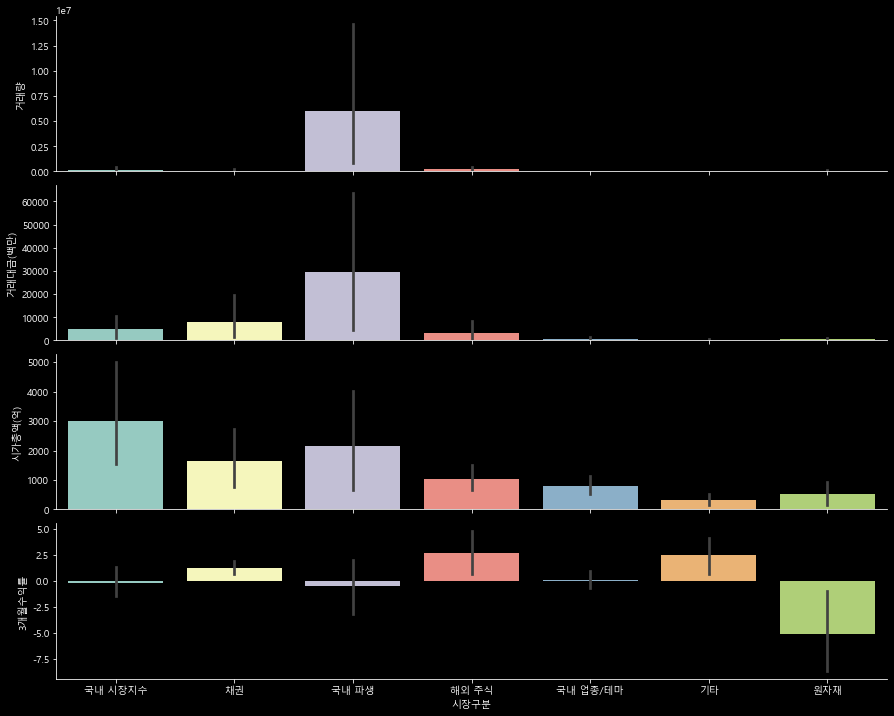

In [11]:
g= sns.PairGrid(
    data=df,
    x_vars='유형',
    y_vars=['거래량', '거래대금(백만)', '시가총액(억)', '3개월수익률'],
    aspect=5
)

g.map(sns.barplot)
g.set(xlabel='시장구분')

In [ ]:
row_cols=['거래량', '거래대금(백만)', '시가총액(억)', '3개월수익률']

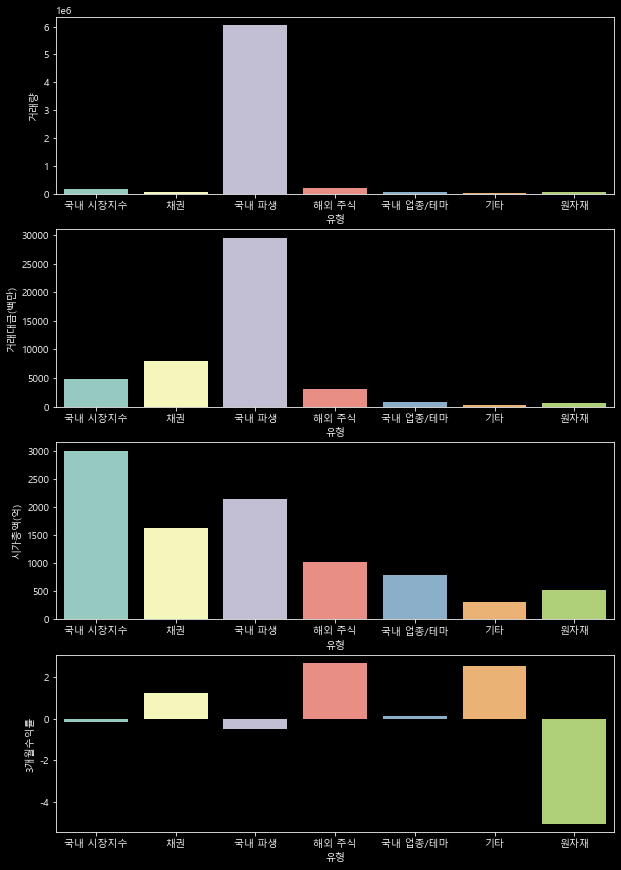

In [17]:
fig, axes = plt.subplots(nrows=len(row_cols), figsize=(10,15))

for i, rcol in enumerate(row_cols):
    sns.barplot(data=df, x='유형', y=rcol, ax=axes[i], ci=None)

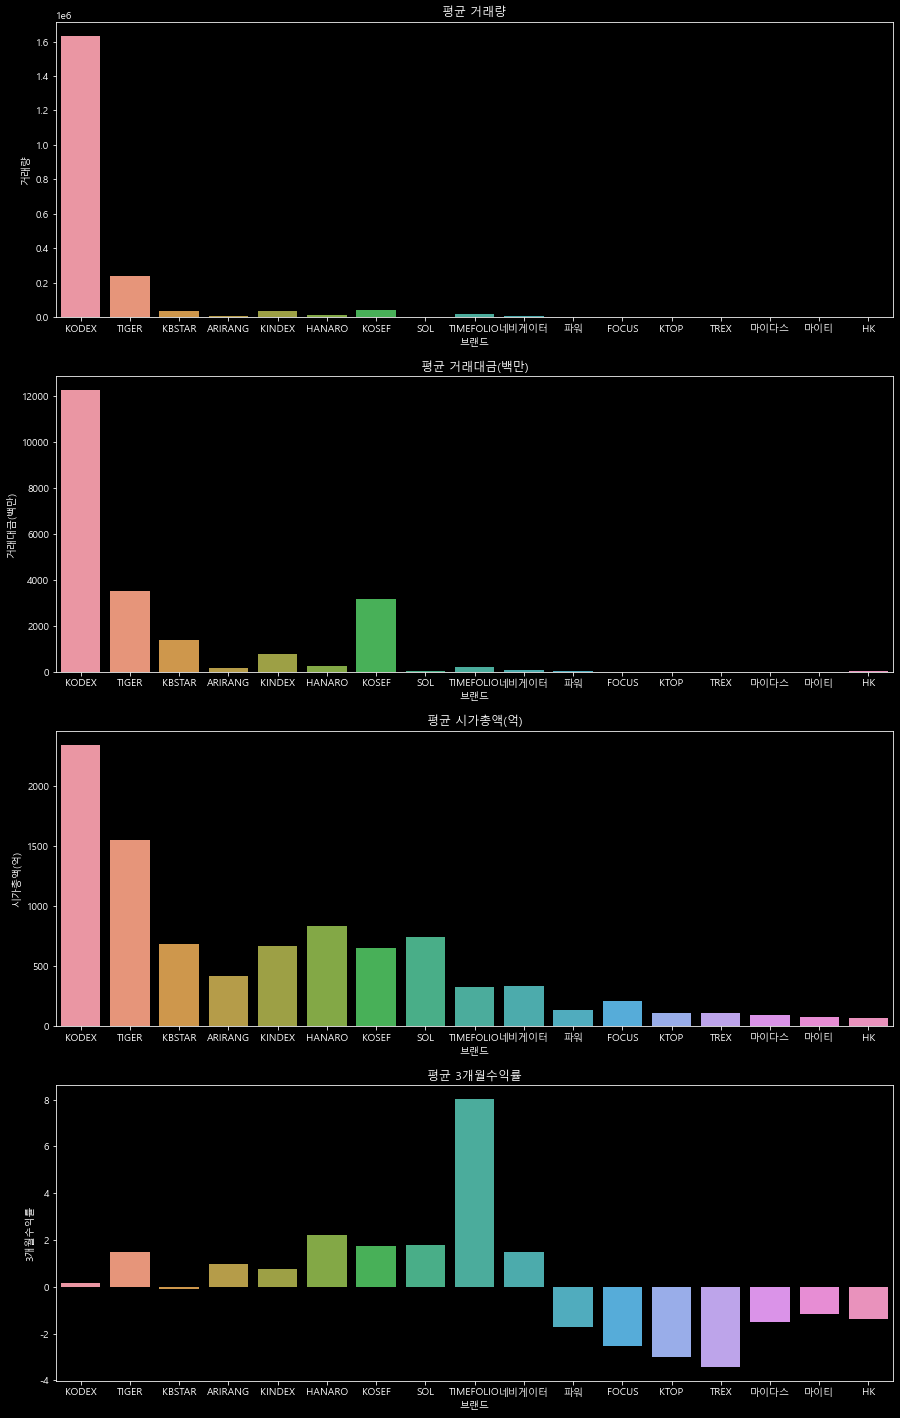

In [22]:
fig, axes = plt.subplots(nrows=len(row_cols), figsize=(15,25))

for i, rcol in enumerate(row_cols):
    g = sns.barplot(data=df, x='브랜드', y=rcol, ax=axes[i], ci=None).set_title(f'평균 {rcol}')

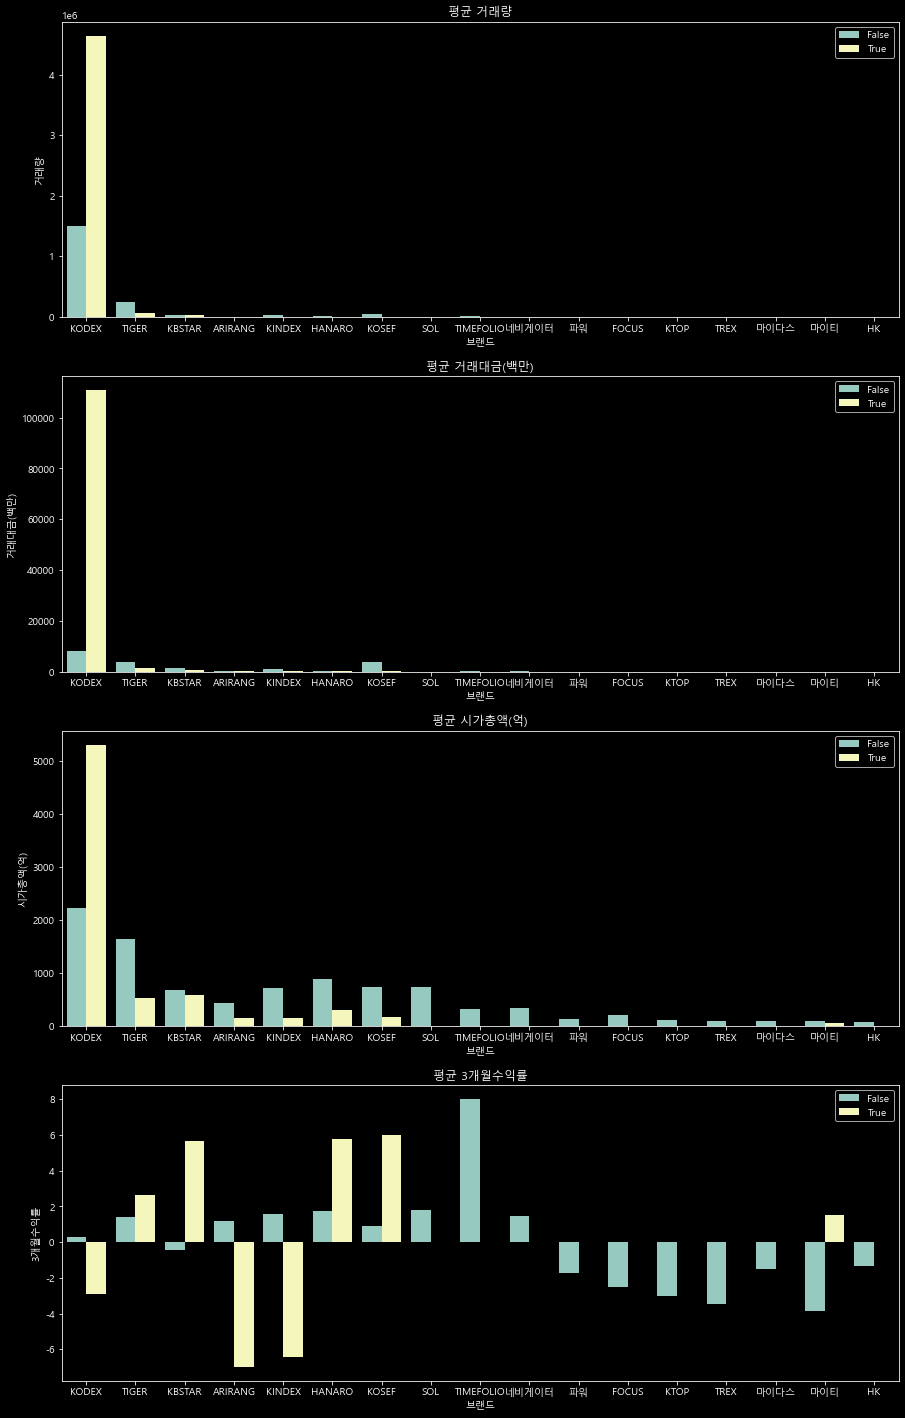

In [23]:
fig, axes = plt.subplots(nrows=len(row_cols), figsize=(15,25))

for i, rcol in enumerate(row_cols):
    g = sns.barplot(data=df, x='브랜드', y=rcol, hue='레버리지', ax=axes[i], ci=None)
    g.set_title(f'평균 {rcol}')
    g.legend(loc=1)

In [26]:
gb = df.groupby(['브랜드', '레버리지'])[row_cols].mean()
gb.style.background_gradient()

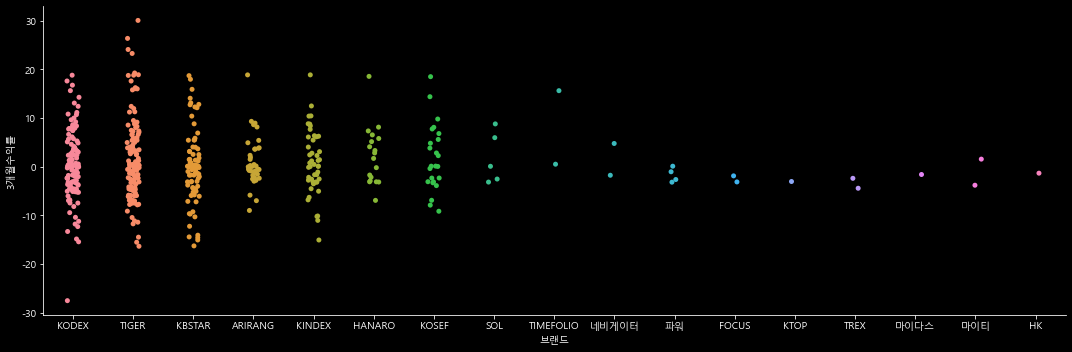

In [28]:
sns.catplot(data=df, x='브랜드', y='3개월수익률', aspect=3)

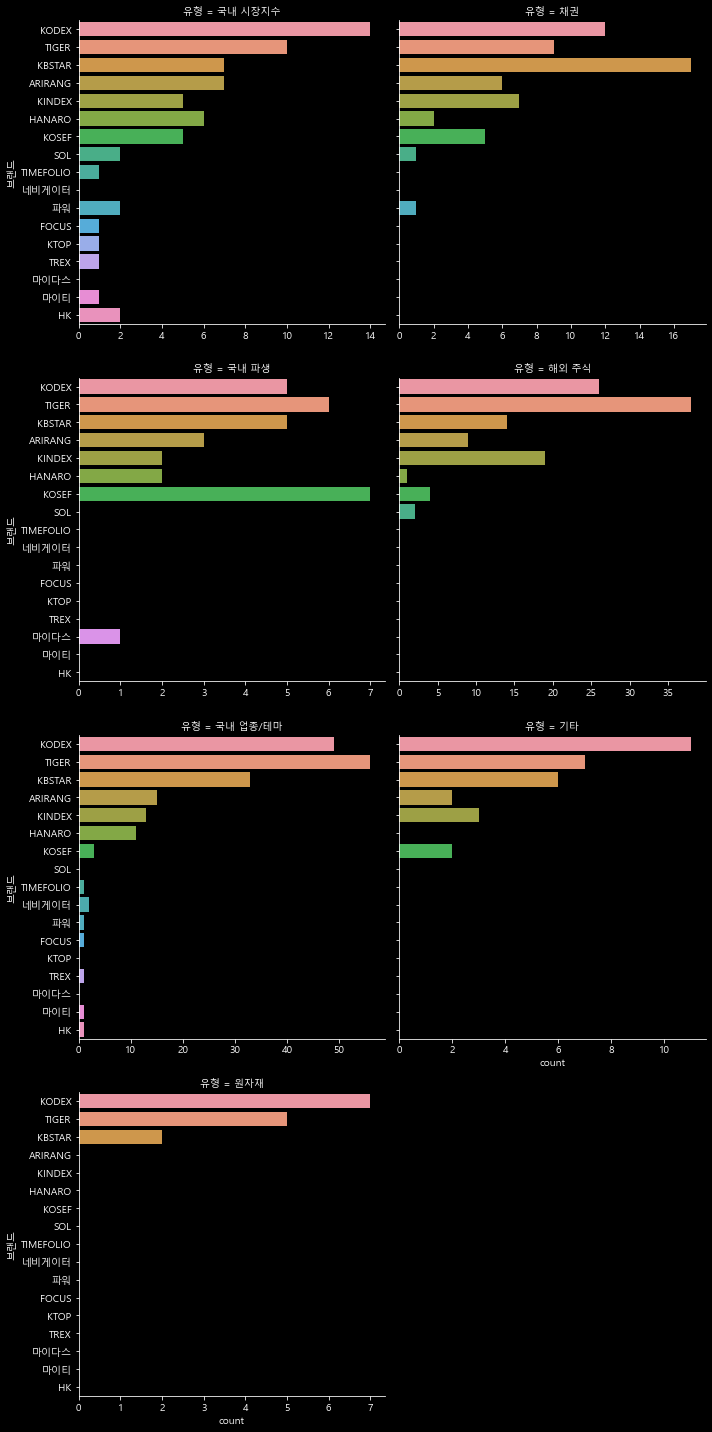

In [30]:
sns.catplot(data=df, y='브랜드', kind='count', sharex=False, col='유형', col_wrap=2)